## Import the Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('german.data-numeric', delim_whitespace=True, header=None)

In [3]:
df[24] = df[24].apply(lambda x: x - 1)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1


## Scaling the data
I tried using scaled data, which made no difference. If you are able to increase the accuracy, then PULL REQUEST

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:, :-1]

In [57]:
X.shape

(1000, 24)

In [10]:
y = df.iloc[:, -1]

In [58]:
y.shape

(1000,)

## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.shape

(700, 24)

In [14]:
sc_X = sc.fit_transform(X_train)

In [15]:
sc_test = sc.transform(X_test)

In [16]:
sc_test.shape

(300, 24)

## Using the Random Forest Classifiers

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators = 10000)

In [20]:
rfc.fit(sc_X, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(sc_test)

In [22]:
rfc_pred.shape

(300,)

In [56]:
# rfc_pred

In [55]:
# y_test

In [24]:
from sklearn.metrics import (classification_report, confusion_matrix)

In [25]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.78      0.93      0.85       209
          1       0.71      0.40      0.51        91

avg / total       0.76      0.77      0.74       300



In [26]:
print(confusion_matrix(y_test, rfc_pred))

[[194  15]
 [ 55  36]]


## Using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(verbose = 3)

In [30]:
lr.fit(sc_X, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=3, warm_start=False)

In [31]:
lr_pred = lr.predict(sc_test)

In [32]:
print(classification_report(y_test, lr_pred))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       209
          1       0.67      0.46      0.55        91

avg / total       0.75      0.77      0.75       300



In [33]:
print(confusion_matrix(y_test, lr_pred))

[[188  21]
 [ 49  42]]


## Using the Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()

In [36]:
svc.fit(sc_X, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
svc_pred = svc.predict(sc_test)

In [38]:
print(classification_report(y_test, svc_pred))

             precision    recall  f1-score   support

          0       0.76      0.91      0.83       209
          1       0.62      0.34      0.44        91

avg / total       0.72      0.74      0.71       300



# Using Grid Search to find the optimal parameters for the SVC

In [46]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'poly']}

In [52]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [54]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7008547008547008, total=   0.8s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7008547008547008, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7025862068965517, total=   0.1s
[CV] kernel=poly, C=0.1, gamma=1 .....................................
[CV]  kernel=poly, C=0.1, gamma=1, score=0.6282051282051282, total= 1.6min
[CV] kernel=poly, C=0.1, gamma=1 .....................................
[CV]  kernel=poly, C=0.1, gamma=1, score=0.6794871794871795, total= 1.9min
[CV] kernel=poly, C=0.1, gamma=1 .....................................
[CV]  kernel=poly, C=0.1, gamma=1, score=0.6508620689655172, total= 3.0min
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7008547008547008, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7008547008547008, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7025862068965517, total=   0.0s
[CV] kernel=poly, C=0.1, gamma=0.1 ............

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 60.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'poly'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

 kernel=rbf, C=100, gamma=0.001,

In [48]:
svcGS1 = SVC(kernel='rbf', C=100, gamma=0.001)

In [54]:
# grid.best_params_ 
# to check the best params

In [49]:
svcGS1.fit(sc_X, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
svcGS1_pred = svcGS1.predict(sc_test)

In [59]:
print(classification_report(y_test, svcGS1_pred))

             precision    recall  f1-score   support

          0       0.79      0.91      0.84       209
          1       0.67      0.43      0.52        91

avg / total       0.75      0.76      0.75       300



## Trying PCA

In [80]:
from sklearn.decomposition import KernelPCA

In [81]:
kpca = KernelPCA(n_components = 3, kernel = 'rbf')

In [82]:
X_train = kpca.fit_transform(sc_X)

In [83]:
X_test = kpca.transform(sc_test)

In [85]:
X_train.shape

(700, 3)

In [102]:
y_train = y_train.reshape(700, 1).shape

In [73]:
r_df = pd.DataFrame(X_train, columns=[0, 1, 2])

In [98]:
# r_df

In [67]:
import seaborn as sns

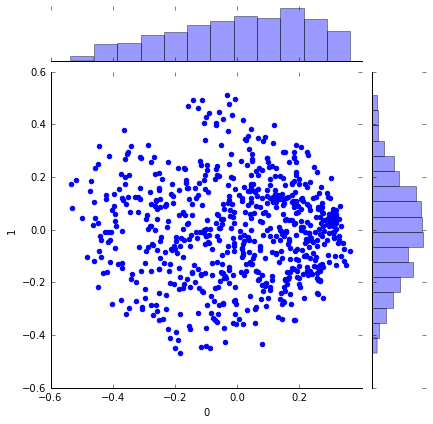

In [79]:
sns.jointplot(0, 1, r_df)

In [99]:
svcGS2 = SVC(kernel='rbf', C=100, gamma=0.001)

In [100]:
svcGS2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
svcGS2_pred = svcGS2.predict(X_test)

In [105]:
print(classification_report(y_test, svcGS2_pred))

             precision    recall  f1-score   support

          0       0.70      1.00      0.82       209
          1       0.00      0.00      0.00        91

avg / total       0.49      0.70      0.57       300



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# I will be adding better methods when I figure them out.
## Also feel free to Pull Request when you get better accuracy.


## This dataset itself could be a constraint here. But still, there is always a better result.